In [1]:
import os
os.chdir('../')
os.getcwd()

'C:\\Users\\diego\\Documents\\DIPLOMATURA\\Modulo 2\\clase2'

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score

import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("./data/bankMarketing/02 - procesada/bankMarketingTotal.csv",sep=';')

In [4]:
train.head()

,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,student_retired,degree,previousProd,marriedAdmin,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,cuartilesAge,decilesAge,bucketsAge
0,0,0,0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3,9,"(50, 60]"
1,0,0,0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3,9,"(50, 60]"
2,0,1,0,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,4,"(30, 40]"
3,0,0,0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2,5,"(30, 40]"
4,0,0,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3,9,"(50, 60]"


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   default            41188 non-null  int64  
 1   housing            41188 non-null  int64  
 2   loan               41188 non-null  int64  
 3   duration           41188 non-null  int64  
 4   campaign           41188 non-null  int64  
 5   pdays              41188 non-null  int64  
 6   previous           41188 non-null  int64  
 7   emp.var.rate       41188 non-null  float64
 8   cons.price.idx     41188 non-null  float64
 9   cons.conf.idx      41188 non-null  float64
 10  euribor3m          41188 non-null  float64
 11  nr.employed        41188 non-null  float64
 12  y                  41188 non-null  int64  
 13  student_retired    41188 non-null  int64  
 14  degree             41188 non-null  int64  
 15  previousProd       41188 non-null  int64  
 16  marriedAdmin       411

In [6]:
X = train.drop(columns = ["y", "bucketsAge"])
y = train.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
print(X_train.shape)
print(X_test.shape)

(27595, 35)
(13593, 35)


In [8]:
#Inicializo el arbol. En este caso utilizo todos los valores por defecto
treeModel = tree.DecisionTreeClassifier()
#Entreno el modelo con la informacion de train
treeModel.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

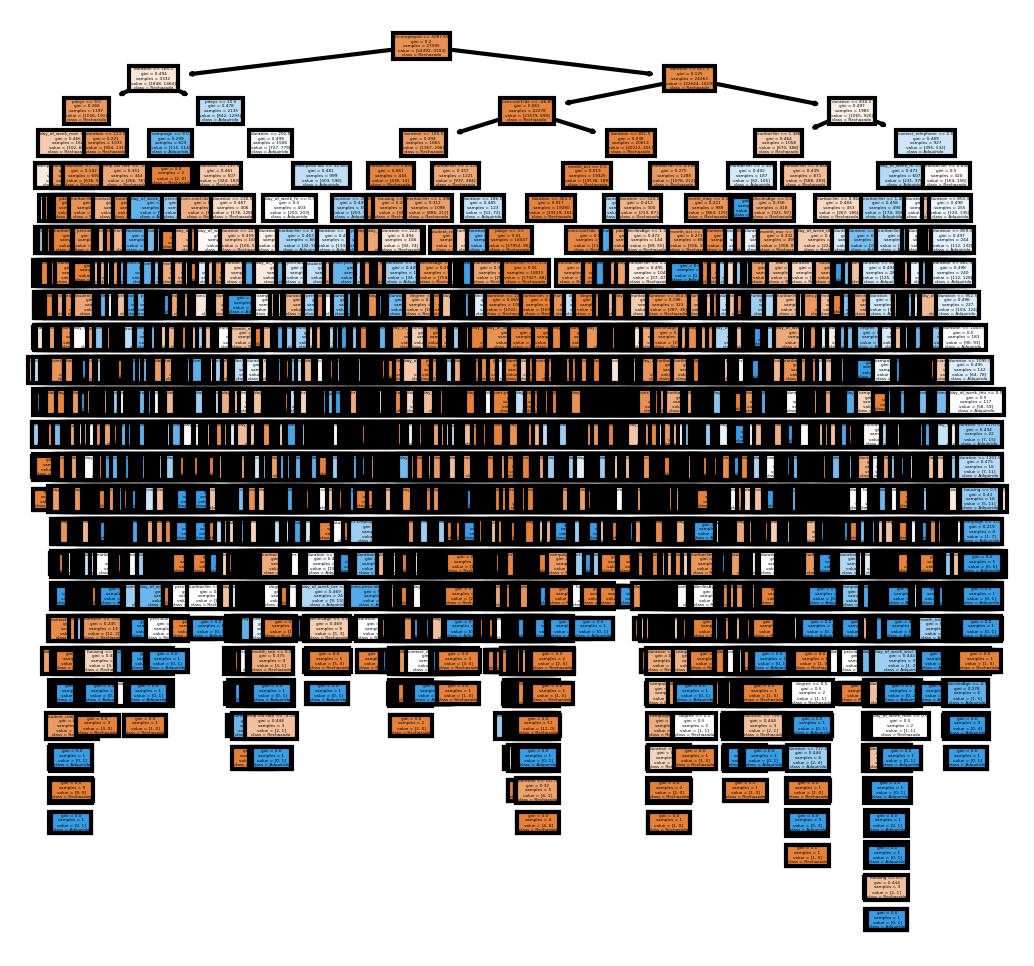

In [10]:
#Imprimo el arbol, ademas puedo guardarlo en un archivo para poder visualizarlo en otro lugar o utilizar la imagen en una 
#presentacion
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(treeModel,
               feature_names = X_train.columns, 
               class_names=["Rechazado", "Adquirido"],
               filled = True);
fig.savefig('./data/bankMarketing/03 - Graficos/arbolTodaProfundidad.png')

In [11]:
#La funcion export_text es muy interesante ya que podemos visualizar el arbol en forma de texto, entonces podemos observar
#Los cortes, los niveles, etc
r = tree.export_text(treeModel, feature_names=list(X_train.columns))
print(r)

|--- nr.employed <= 5087.65
|   |--- duration <= 165.50
|   |   |--- pdays <= 9.50
|   |   |   |--- day_of_week_mon <= 0.50
|   |   |   |   |--- cons.price.idx <= 94.04
|   |   |   |   |   |--- duration <= 124.00
|   |   |   |   |   |   |--- pdays <= 3.50
|   |   |   |   |   |   |   |--- decilesAge <= 1.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- decilesAge >  1.50
|   |   |   |   |   |   |   |   |--- decilesAge <= 3.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- decilesAge >  3.50
|   |   |   |   |   |   |   |   |   |--- month_nov <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- day_of_week_fri <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- day_of_week_fri >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- month_nov >  0.50
|   |   |   |   |   |   |   |   |   |   |

In [12]:
#Generamos las predicciones
predictedValues = treeModel.predict(X_test)

In [13]:
#Vamos a medir el accuracy
accuracy_score(y_test, predictedValues)

0.8853821820054439

Como vimos anteriormente, la profundidad el arbol es muy alta, por ende, vamos a configurar la maxima profundidad en 3, es decir, max_depth=3

In [14]:
treeModel = tree.DecisionTreeClassifier(max_depth=3)
treeModel.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

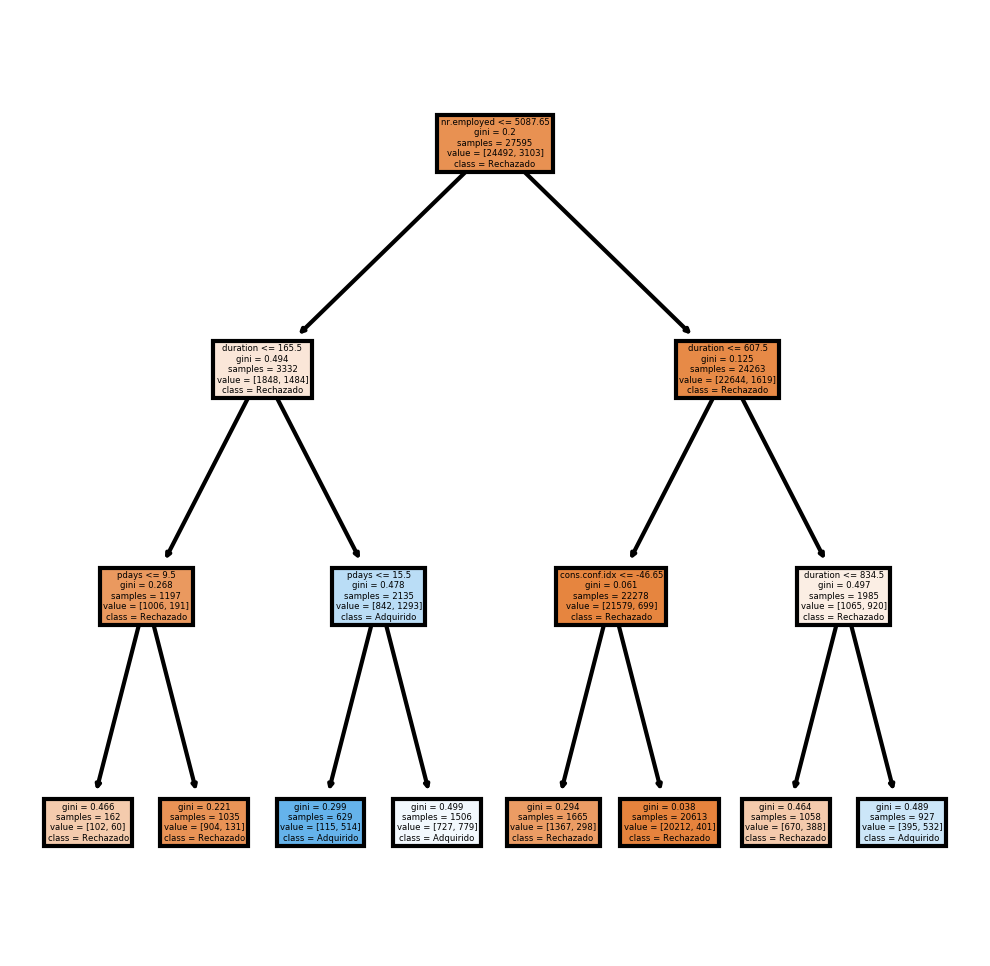

In [15]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(treeModel,
               feature_names = X_train.columns, 
               class_names=["Rechazado", "Adquirido"],
               filled = True);
fig.savefig('./data/bankMarketing/03 - Graficos/arbolTodaProfundidad.png')

In [16]:
predictedValues = treeModel.predict(X_test)
accuracy_score(y_test, predictedValues)

0.9082616052379902

In [17]:
treeModel = tree.DecisionTreeClassifier(max_depth=3, criterion="entropy", max_features="sqrt")
treeModel.fit(X_train, y_train)
predictedValues = treeModel.predict(X_test)
accuracy_score(y_test, predictedValues)

0.8997278010740822

In [18]:
treeModel = tree.DecisionTreeClassifier(max_depth=3, criterion="entropy", splitter="random")
treeModel.fit(X_train, y_train)
predictedValues = treeModel.predict(X_test)
accuracy_score(y_test, predictedValues)

0.9009784447877585

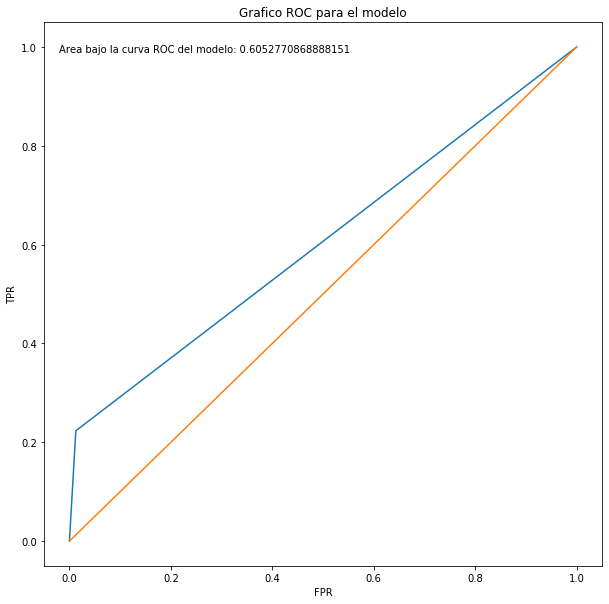

In [19]:
areaBajoCurvaRoc = roc_auc_score(y_test, predictedValues)
fpr, tpr, _ = roc_curve(y_test, predictedValues)
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el modelo")
plt.plot(fpr, tpr)
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.annotate('Area bajo la curva ROC del modelo: {}'.format(areaBajoCurvaRoc), (-0.02,0.99))
plt.show()

In [20]:
pd.DataFrame(confusion_matrix(y_test, predictedValues))

,0,1
0,11904,152
1,1194,343


In [21]:
precision_score(y_test, predictedValues)

0.692929292929293

In [22]:
recall_score(y_test, predictedValues)

0.22316200390370852

Los parámetros que podemos ajustar en el modelo son:
**DecisionTreeClassifier**
* criterion ({"gini", "entropy"}): Valor default="gini" Es la métrica que medirá la calidad del split. 
* splitter: Este parámetro es utilizado para la selección de las variables. {“best”, “random”}, default=”best”. Si seleccionamos *best* elegirá la variable que mejor split genere. Si seleccionamos *random* elegirá la variable aleatoriamente y buscará splits de forma aleatoria, luego buscará el mejor de todos los splits.
* max_depth (int): Valor default=None. Este parámetro medirá la máxima profundidad que tendrá el árbol. Si el valor es None, lo que hará es crecer el árbol hasta que las hojas queden puras o hasta que la cantidad de observaciones sea menor al parámetro min_samples_split. Tengan en cuenta que este parámetro hará que generalicemos más o menos el algoritmo.
* min_samples_split (int o float): Valor default=2. Este parámetro nos indica la cantidad de observaciones mínimas que debe tener un nodo para que se realice un split. Si el valor ingresado es un entero, será considerado un valor absoluto (definido como el mínimo de observaciones para el split), si el valor ingresado es un float, el número será la división entre el valor ingresado y el total de observaciones de la base.
* min_samples_leaf (int o float): Valor default=1. Este parámetro nos indica cuál es el número mínimo que debe tener un nodo para ser nodo hoja. El cálculo del valor es igual al parámetro anterior.
* min_weight_fraction_leaf (float): Valor default=0. Este parámetro ayuda a determinar el tamaño mínimo del nodo final de cada árbol de decisión. El nodo final también se conoce como hoja. Esto es bastante similar a min_samples_leaf, pero en su lugar utiliza una fracción de la suma total de observaciones.
* max_features (int, float o {"auto", "sqrt", "log2"}): Valor default=None. El número de variables a considerar para buscar el mejor split. Si el valor es int, se considera como el número maxímo de variables. Si el valor es float, se calculará como multiplicación de max_features y la cantidad total de variables. Si el valor es auto, se calcula como la raíz cuadrada del total de variables lo mismo que si el parámetro posee el valor sqrt. Si el parámetro posee el valor log2, entonces se calculará como el log2 del total de variables. Si el valor es None, se usarán todas las variables.
* random_state (int): Valor default=None. Controla el factor aleatorio del estimador. Este parámetros es muy utilizado para poder lograr que las ejecuciones sean siempre iguales (teniendo en cuenta que usamos los mismos hiperparámetros).
* max_leaf_nodes (int): Valor default=None. Es la cantidad máxima de de nodos hoja que vamos a querer tener en un árbol. Este es otro parámetro que podemos ajustar a la hora de mejorar la generalización del modelo. Si el valor es None, crecerá a tantos nodos hojas como el modelo cree necesario.
* min_impurity_decrease (float): Valor default=0. Un nodo se dividirá si el split genera un decrecimiento en la impureza menor o igual al valor definido.
* class_weight (dict, lista de dicts o "balanced"): Valor default=None. Este parámetro sirve para balancear las clases, es decir, si tenemos clases desbalanceadas le pasaremos un diccionario en el peso que posee cada una de las clases en la base de entrenamiento. Si usamos el valor "balanced", automáticamente el modelo ajustará las clases inversamente proporcional a la frecuencia de las clases (n_samples / (n_clases * np.bincount(y))
* ccp_alpha (float no negativo): Valor default=0. Parámetro de complejidad utilizado para la poda de costo mínimo-complejidad. Se elegirá el subárbol que posea el mayor valor pero siempre siendo menor al ccp_alpha definido.


In [25]:
treeModel = tree.DecisionTreeClassifier(max_depth=3, criterion="entropy", max_features="sqrt", splitter="random", min_samples_split=50)
treeModel.fit(X_train, y_train)
predictedValues = treeModel.predict(X_test)
accuracy_score(y_test, predictedValues)

0.887515633046421

In [26]:
treeModel = tree.DecisionTreeClassifier(max_depth=3, criterion="entropy", max_features="sqrt", min_samples_split=50)
treeModel.fit(X_train, y_train)
predictedValues = treeModel.predict(X_test)
accuracy_score(y_test, predictedValues)

0.9000220701831825

In [30]:
treeModel = tree.DecisionTreeClassifier(max_depth=3, criterion="entropy", min_weight_fraction_leaf = 0.5)
treeModel.fit(X_train, y_train)
predictedValues = treeModel.predict(X_test)
accuracy_score(y_test, predictedValues)

0.8869270948282204

In [31]:
treeModel = tree.DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state = 30)
treeModel.fit(X_train, y_train)
predictedValues = treeModel.predict(X_test)
accuracy_score(y_test, predictedValues)



0.9082616052379902

In [34]:
treeModel = tree.DecisionTreeClassifier(max_depth=3, criterion="entropy", max_leaf_nodes = 5)
treeModel.fit(X_train, y_train)
predictedValues = treeModel.predict(X_test)
accuracy_score(y_test, predictedValues)




0.90274405944236

In [36]:
treeModel = tree.DecisionTreeClassifier(max_depth=3, min_impurity_decrease = 0.9)
treeModel.fit(X_train, y_train)
predictedValues = treeModel.predict(X_test)
accuracy_score(y_test, predictedValues)




0.8869270948282204

In [37]:
treeModel = tree.DecisionTreeClassifier(max_depth=3, class_weight = "balanced")
treeModel.fit(X_train, y_train)
predictedValues = treeModel.predict(X_test)
accuracy_score(y_test, predictedValues)




0.8474214669315089

In [40]:
treeModel = tree.DecisionTreeClassifier(max_depth=3, ccp_alpha = 2)
treeModel.fit(X_train, y_train)
predictedValues = treeModel.predict(X_test)
accuracy_score(y_test, predictedValues)



0.8869270948282204

Realizamos otro árbol de decisión eliminando las variables:

Duration: en la descripción indicaba que esta variable no era representativa y que lo recomendable era eliminarla para tener un modelo más robusto

pdays: Dado que el modelo utiliza el número 999 para indicar que no hubo un contacto previo, esto genera distorsiones en el análisis

Las variables macroeconómicas fueron eliminadas debido a que entendemos que están más asociadas al momento en el cual se obtuvo el préstamo y que generan mucha repeticiones entre los distintos id y no son variables que dependa de cada uno de las personas que van a tomar una decisión entre aceptar y rechazar

In [58]:
X2 = train.drop(columns = ["y", "bucketsAge", "duration", "pdays", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"])
y2 = train.y
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [60]:
treeModel2 = tree.DecisionTreeClassifier(max_depth=3)
treeModel2.fit(X2_train, y2_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

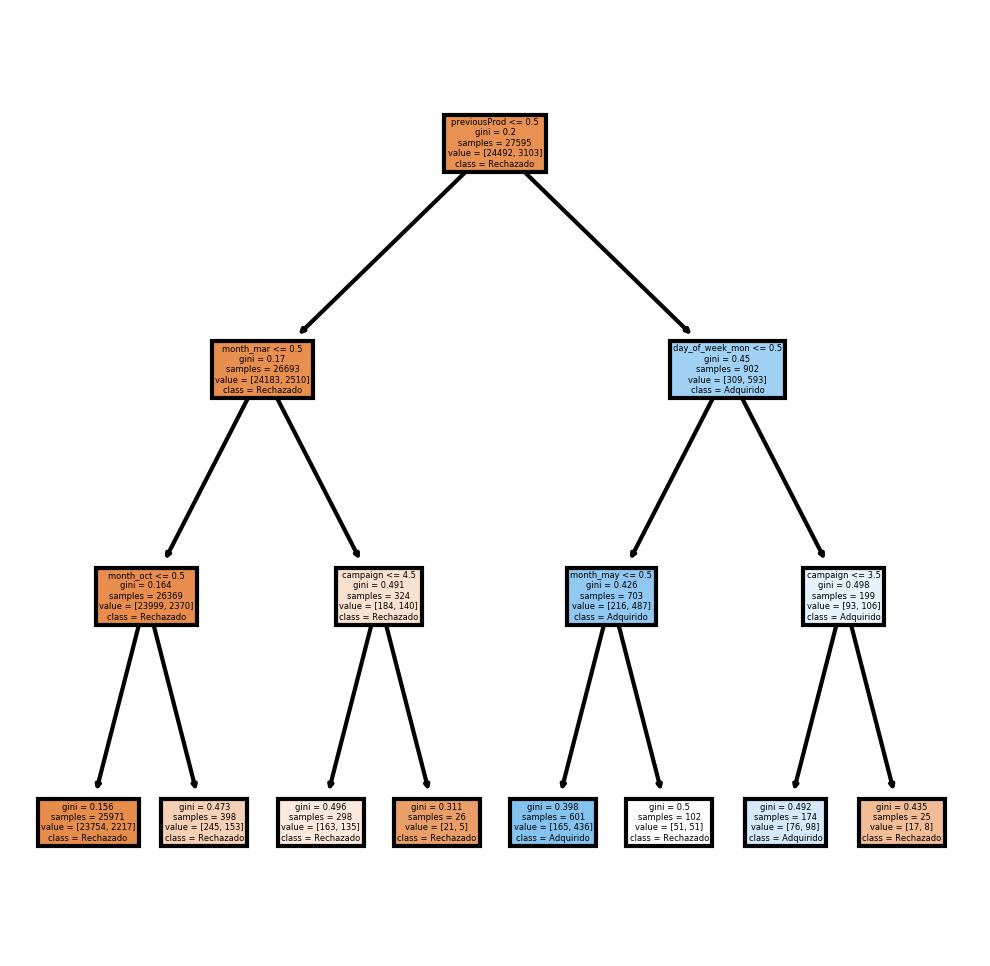

In [61]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(treeModel2,
               feature_names = X2_train.columns, 
               class_names=["Rechazado", "Adquirido"],
               filled = True);
fig.savefig('./data/bankMarketing/03 - Graficos/arbolTodaProfundidad2.png')

In [62]:
predictedValues2 = treeModel.predict(X2_test)
accuracy_score(y2_test, predictedValues2)

0.8969322445376297

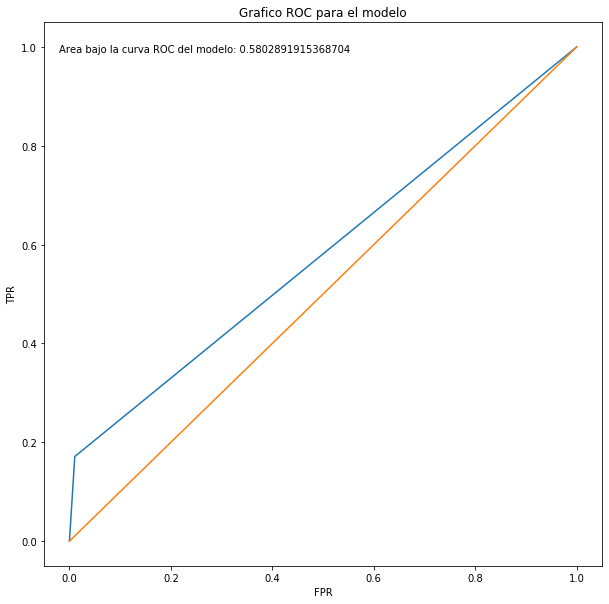

In [63]:
areaBajoCurvaRoc = roc_auc_score(y2_test, predictedValues2)
fpr, tpr, _ = roc_curve(y2_test, predictedValues2)
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el modelo")
plt.plot(fpr, tpr)
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.annotate('Area bajo la curva ROC del modelo: {}'.format(areaBajoCurvaRoc), (-0.02,0.99))
plt.show()